# **Project Name   -   YES BANK STOCK  CLOSING PRICE PREDICTION**


##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Manohara M**


# **Project Summary -**

This project is about analyzing and predicting the monthly closing stock prices of Yes Bank, a well-known bank in India. Since 2018, the bank has been in the news because of a fraud case involving its former CEO, Rana Kapoor. This situation affected investor trust and the bank’s image, which likely influenced its stock prices. The main goal of this project is to predict the closing stock price for each month and to see if machine learning models can give accurate results based on the past trends.

The dataset used contains the bank’s monthly stock data from July 2005 to November 2020. It includes four important columns: Open, High, Low, and Close prices for every month. The Close price is the value we want to predict. The first step involved cleaning the data, converting dates into proper format, and checking for any missing values or formatting issues.

Next, we did data wrangling and preprocessing to prepare the dataset for analysis. We also scaled the data using StandardScaler, which helps models work better by making sure all features are on the same scale. We checked for skewness in the data and applied transformations when needed to make the data more suitable for modeling.

We then explored the dataset using several visualizations like line plots, scatter plots, histograms, and pair plots. These helped us understand patterns and relationships in the data. One key observation was that the closing prices dropped sharply after 2018, showing the likely impact of the fraud case.

We used three machine learning models to predict the closing prices:

Linear Regression – A basic model that finds a straight-line relationship between the features.

K-Nearest Neighbors (KNN) – A model that makes predictions based on nearby data points.

Random Forest – A powerful ensemble model that uses many decision trees to make better predictions.

To test how well the models performed, we used R-squared (R²) to measure accuracy and Mean Squared Error (MSE) to check prediction errors. Among the three models, the Random Forest model performed the best, giving the lowest MSE and highest R² score. This shows it was able to understand complex patterns in the stock data.

# **GitHub Link -**

https://github.com/Manohara4

# **Problem Statement**


**Yes Bank is a popular bank in India. Since 2018, it has been in the news because of a fraud case involving its former CEO, Rana Kapoor. This made people curious about how the case affected the bank’s stock prices. The dataset used here has the monthly stock prices of Yes Bank, including the opening, highest, lowest, and closing prices for each month. The main aim of this project is to predict the closing price of the stock for each month and check if time series or other prediction models can give accurate results.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the file path for the dataset stored in Google Drive
file_path='/content/drive/My Drive/LABMENTIX/Copy of data_YesBank_StockPrices.csv'

In [4]:
df=pd.read_csv(file_path)

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


### What did you know about your dataset?

The dataset contains monthly stock price data of Yes Bank from July 2005 to November 2020. It includes the following columns for each month:

Date – The month and year of the stock data

Open – The price at which the stock opened that month

High – The highest price of the stock in that month

Low – The lowest price of the stock in that month

Close – The price at which the stock closed that month

The target variable in this project is the Close price, which we aim to predict.

There are no missing values, and the dataset is already fairly clean.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
  # Dataset Describe
  df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

**Date**-----The month and year for which the stock prices are recorded.

**Open**-----The price at which the stock opened for that month.

**High**-----The highest price reached by the stock during that month.

**Low**----- The lowest price reached by the stock during that month.

**Close**----The price at which the stock closed at the end of that month.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for column in df.columns:
    print(f"{column} has {df[column].nunique()} unique values")


Date has 185 unique values
Open has 183 unique values
High has 184 unique values
Low has 183 unique values
Close has 185 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [14]:
#creating a copy of dataset, so as to keep the original dataset intact.
yesbank_df=df.copy()

In [15]:
# Changing the "Date" column to datetime object.
yesbank_df['Date'] = pd.to_datetime(yesbank_df['Date'], format='%b-%y')

In [16]:
yesbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [17]:
yesbank_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

Converted Date column to datetime:

This allows us to extract useful time-based features and analyze trends over time.

In [18]:
X=yesbank_df.drop(['Close','Date'],axis=1)
Y=yesbank_df['Close']

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

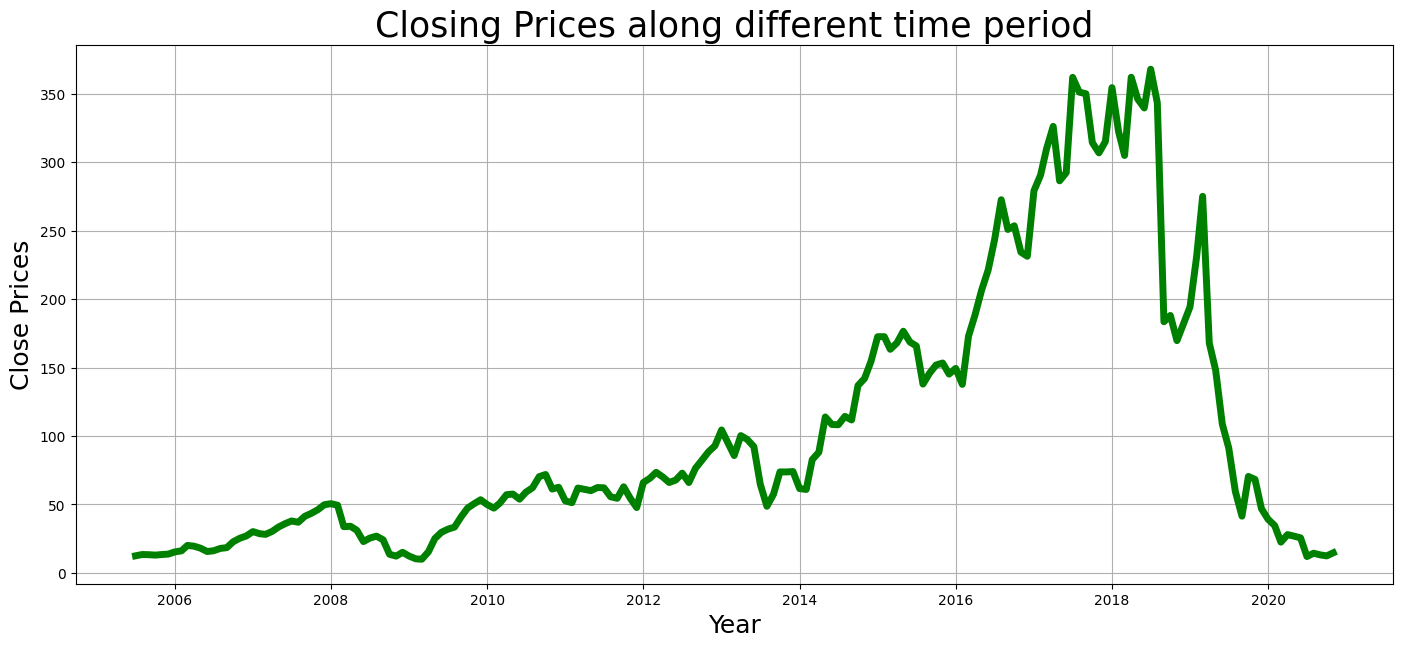

In [19]:
# Chart - 1 visualization code
# Visualisation of closing price with respect to dates.
plt.figure(figsize=(17,7))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Prices', fontsize=18)
plt.plot(yesbank_df['Date'], yesbank_df['Close'],linewidth=5,color='green')
plt.title('Closing Prices along different time period', fontsize=25)
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart clearly shows trends and changes in closing stock prices over time, making it ideal for analyzing Yes Bank’s performance.

##### 2. What is/are the insight(s) found from the chart?

The stock price rose gradually at first, peaked, then sharply declined, indicating early growth followed by a major downfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helps identify strong and weak periods for better decisions. The long-term decline signals negative growth, possibly due to poor management or financial issues.

#### Chart - 2

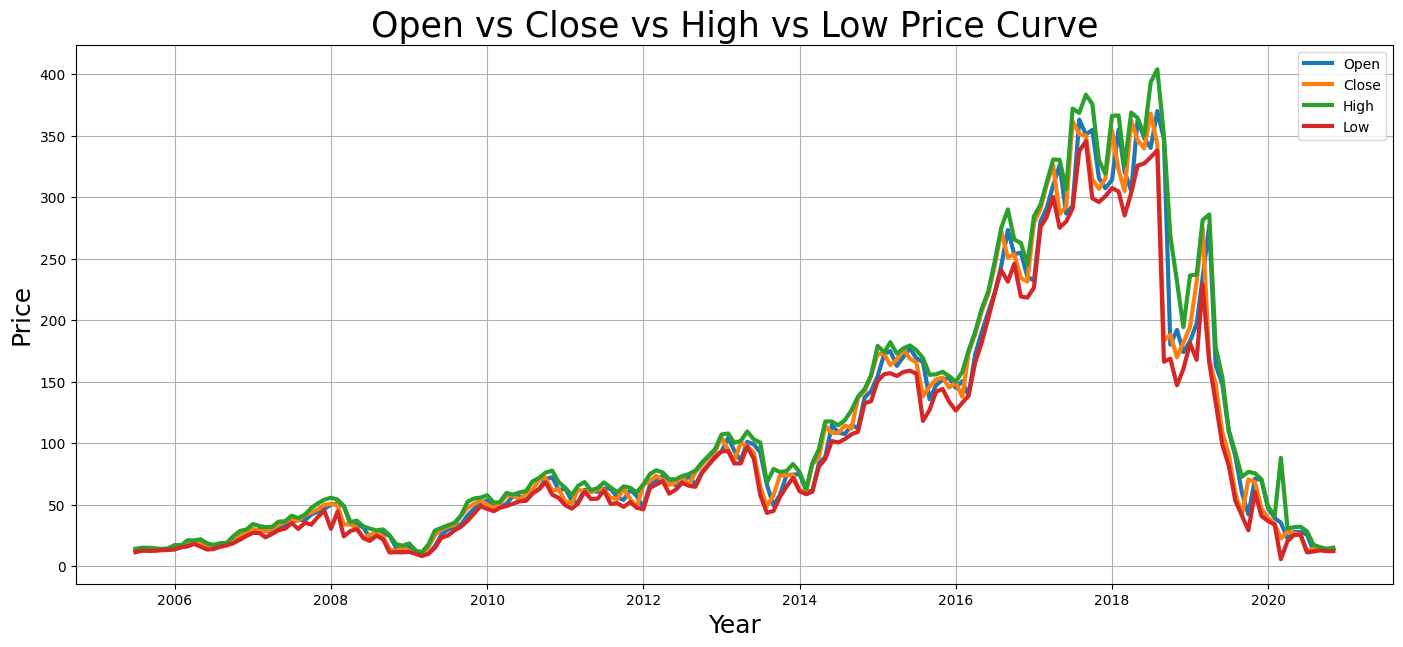

In [20]:
# Chart - 2 visualization code
#Open vs Close vs High vs Low Price Curve
plt.figure(figsize=(17,7))
plt.plot(yesbank_df['Date'], yesbank_df['Open'], label='Open', linewidth=3)
plt.plot(yesbank_df['Date'], yesbank_df['Close'], label='Close', linewidth=3)
plt.plot(yesbank_df['Date'], yesbank_df['High'], label='High', linewidth=3)
plt.plot(yesbank_df['Date'], yesbank_df['Low'], label='Low', linewidth=3)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Open vs Close vs High vs Low Price Curve', fontsize=25)
plt.grid()
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to compare all four key price points—Open, Close, High, and Low—over time in a single view.

##### 2. What is/are the insight(s) found from the chart?

It shows that while prices fluctuated heavily, the Open and Close values mostly moved close together, indicating tight daily trading ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help understand price volatility and investor behavior. The increasing gap in later years could reflect market uncertainty or poor performance.

#### Chart - 3

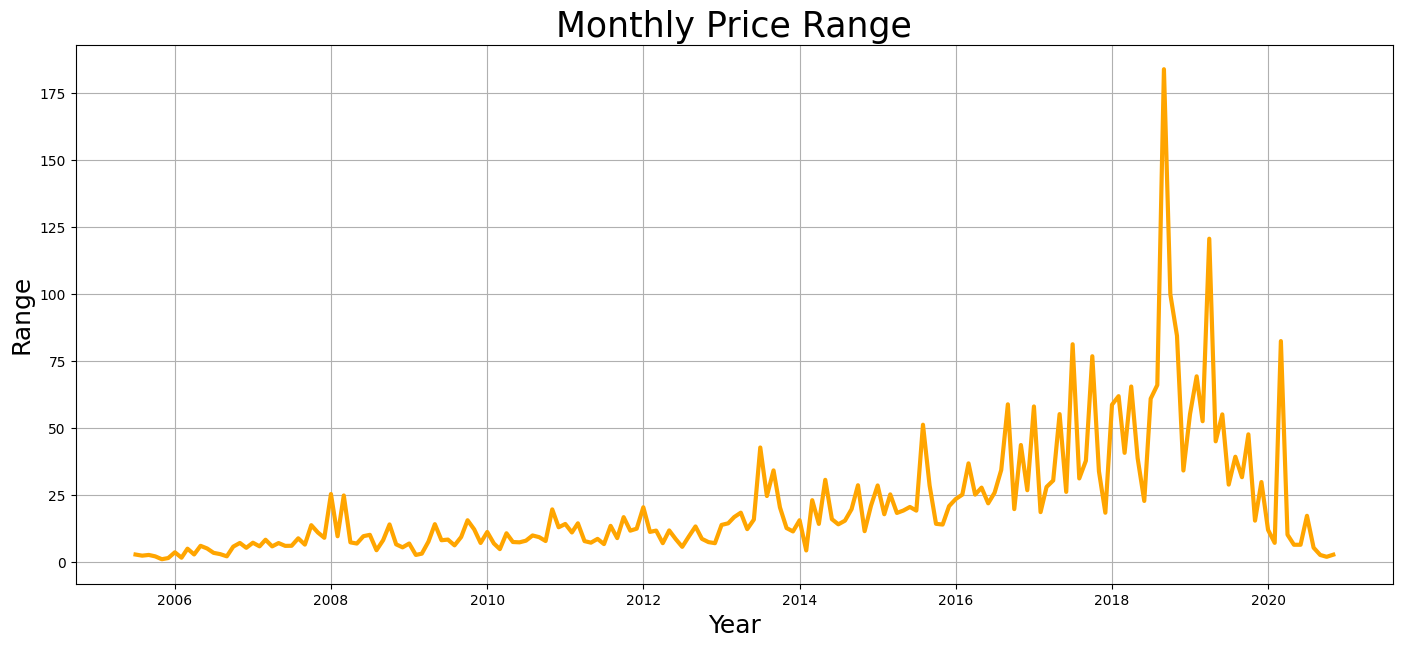

In [21]:
# Chart - 3 visualization code
#Monthly Price Range
plt.figure(figsize=(17,7))
yesbank_df['Range']  = yesbank_df['High'] - yesbank_df['Low']
plt.plot(yesbank_df['Date'],yesbank_df['Range'],label='Range',linewidth=3,color='orange')
plt.xlabel("Year",fontsize=18)
plt.ylabel("Range",fontsize=18)
plt.title("Monthly Price Range",fontsize=25)
plt.grid()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to visualize the difference between monthly high and low prices, showing volatility.

##### 2. What is/are the insight(s) found from the chart?

It reveals that the price range widened significantly after 2018, indicating higher volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While volatility can mean trading opportunities, it may also signal risk and instability, negatively affecting investor confidence.

#### Chart - 4

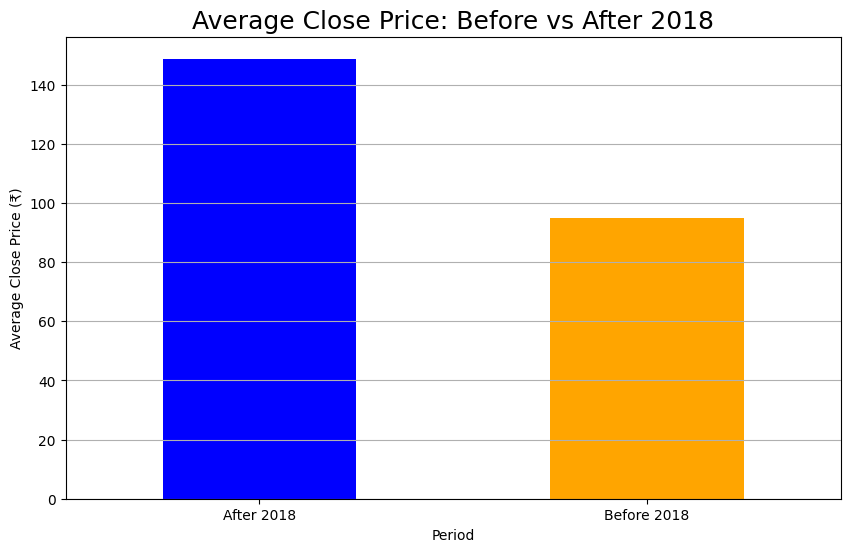

In [22]:
# Chart - 4 visualization code
# Create a new column for time period
yesbank_df['Period'] = yesbank_df['Date'].apply(lambda x: 'Before 2018' if x < pd.to_datetime('2018-01-01') else 'After 2018')

# Group and calculate mean
avg_close = yesbank_df.groupby('Period')['Close'].mean()

# Plot
#Average Close Price: Before vs After 2018
plt.figure(figsize=(10,6))
avg_close.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Close Price: Before vs After 2018", fontsize=18)
plt.ylabel("Average Close Price (₹)")
plt.xlabel("Period")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart comparison was used to understand the average stock performance before and after a key date (2018).

##### 2. What is/are the insight(s) found from the chart?

It shows a clear drop in average closing price after 2018, suggesting a decline in company performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This negative insight indicates investor losses and highlights the need for strategic reforms or management changes.

#### Chart - 5

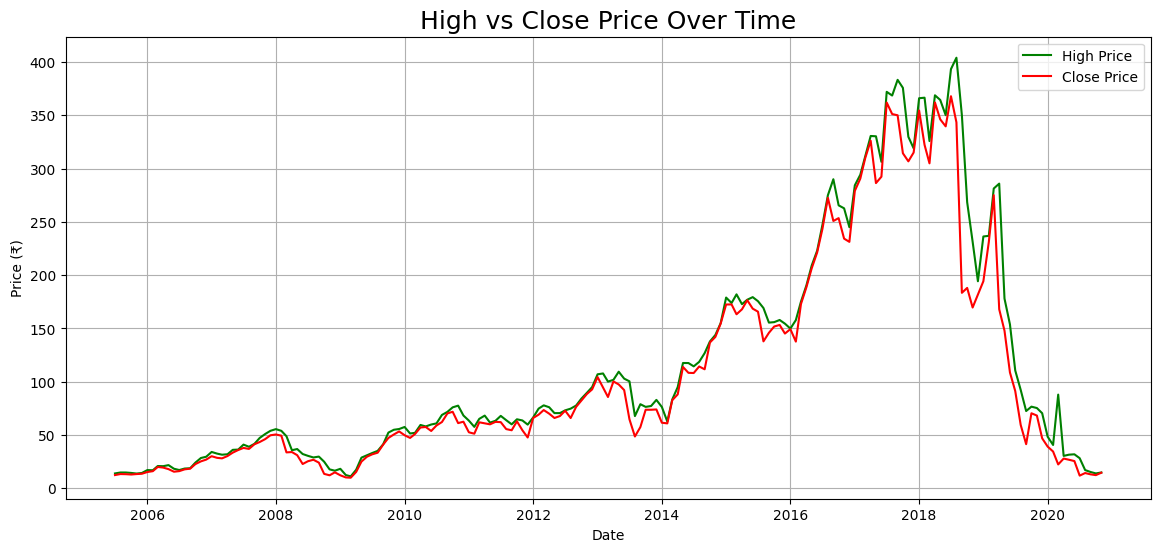

In [23]:
# Chart - 5 visualization code
# Plot High vs Close for each month
plt.figure(figsize=(14,6))
plt.plot(yesbank_df['Date'], yesbank_df['High'], label='High Price', color='green')
plt.plot(yesbank_df['Date'], yesbank_df['Close'], label='Close Price', color='red')
plt.title("High vs Close Price Over Time", fontsize=18)
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

This line chart was picked to compare how much the Close price deviates from the High price.

##### 2. What is/are the insight(s) found from the chart?

The gap between High and Close prices increases over time, indicating closing weakness or selling pressure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This suggests reduced investor optimism and can point to negative growth trends if the pattern persists.

#### Chart - 6

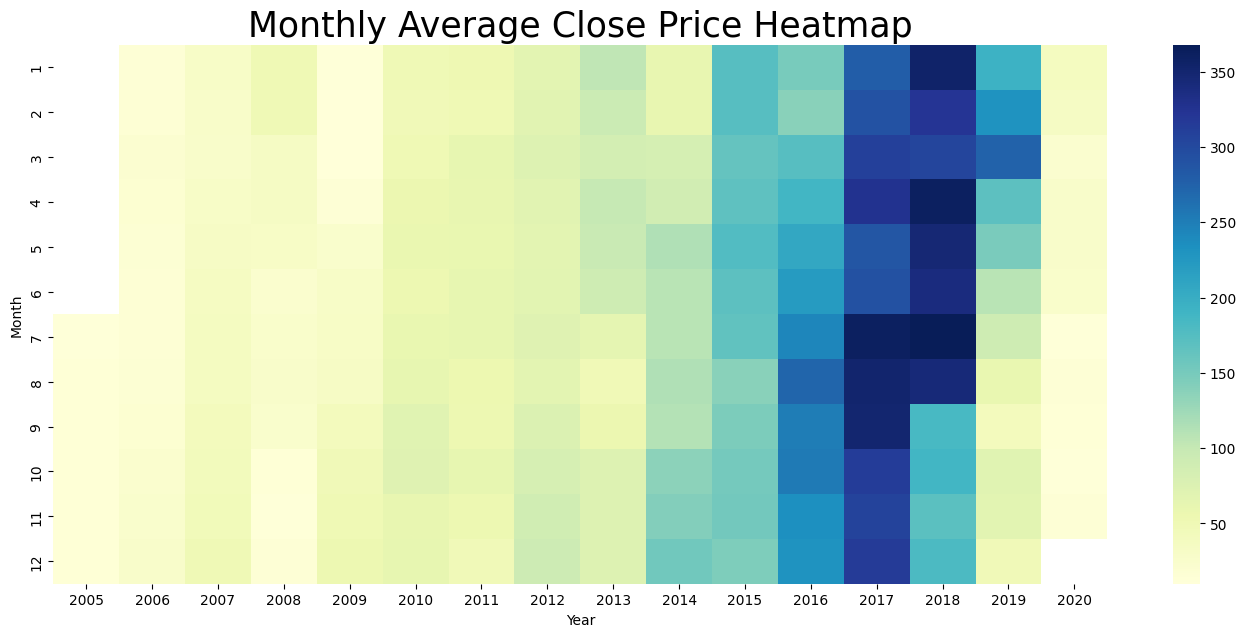

In [24]:
# Chart - 6 visualization code
#  Heatmap of monthly average Close prices
plt.figure(figsize=(17,7))
yesbank_df['Month'] = yesbank_df['Date'].dt.month
yesbank_df['Month'] = yesbank_df['Date'].dt.month
yesbank_df['Year'] = yesbank_df['Date'].dt.year
pivot_table = yesbank_df.pivot_table(values='Close', index='Month', columns='Year')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Monthly Average Close Price Heatmap', fontsize=25)
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap was used to give a year-over-year comparison of monthly closing averages in a clear visual way.

##### 2. What is/are the insight(s) found from the chart?

It shows that average Close prices were higher in earlier years and cooler (lower) in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This visual decline across years confirms weakening performance, indicating a need for strategic improvement.Answer Here

#### Chart - 7

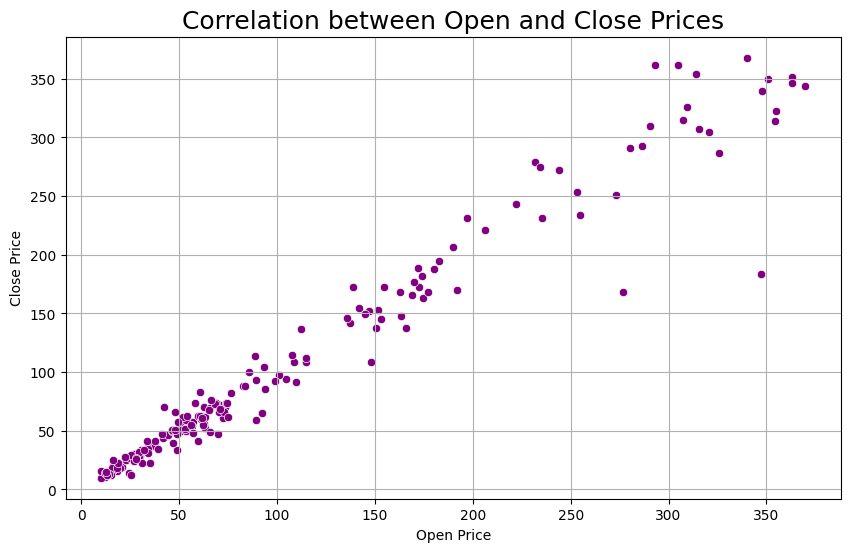

In [25]:
# Chart - 7 visualization code
#Correlation between Open and Close Prices
plt.figure(figsize=(10,6))
sns.scatterplot(data=yesbank_df, x='Open', y='Close', color='purple')
plt.title("Correlation between Open and Close Prices", fontsize=18)
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A scatterplot was used to examine the relationship between Open and Close prices.



##### 2. What is/are the insight(s) found from the chart?

It shows a strong positive correlation, meaning that the stock usually closes near its opening price.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is a neutral to positive insight, showing consistency and stability, but doesn’t indicate strong upward growth.



#### Chart - 8

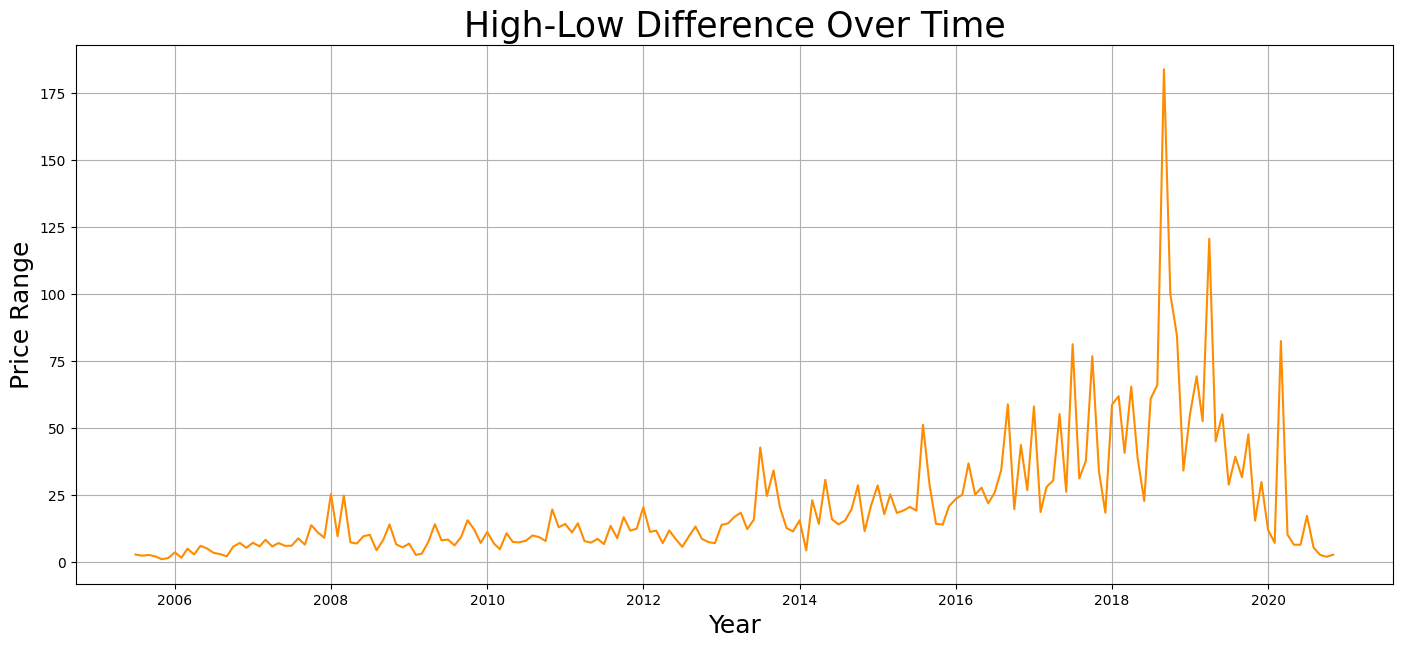

In [26]:
# Chart - 8 visualization code
# Line plot of High-Low difference
plt.figure(figsize=(17,7))
plt.plot(yesbank_df['Date'], yesbank_df['High'] - yesbank_df['Low'], color='darkorange')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Price Range', fontsize=18)
plt.title('High-Low Difference Over Time', fontsize=25)
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to analyze daily trading volatility.

##### 2. What is/are the insight(s) found from the chart?

It reveals that the gap between High and Low prices widened over time, especially during uncertain periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Increased volatility can negatively impact investor trust and might reflect poor stock management or external pressures.

#### Chart - 9

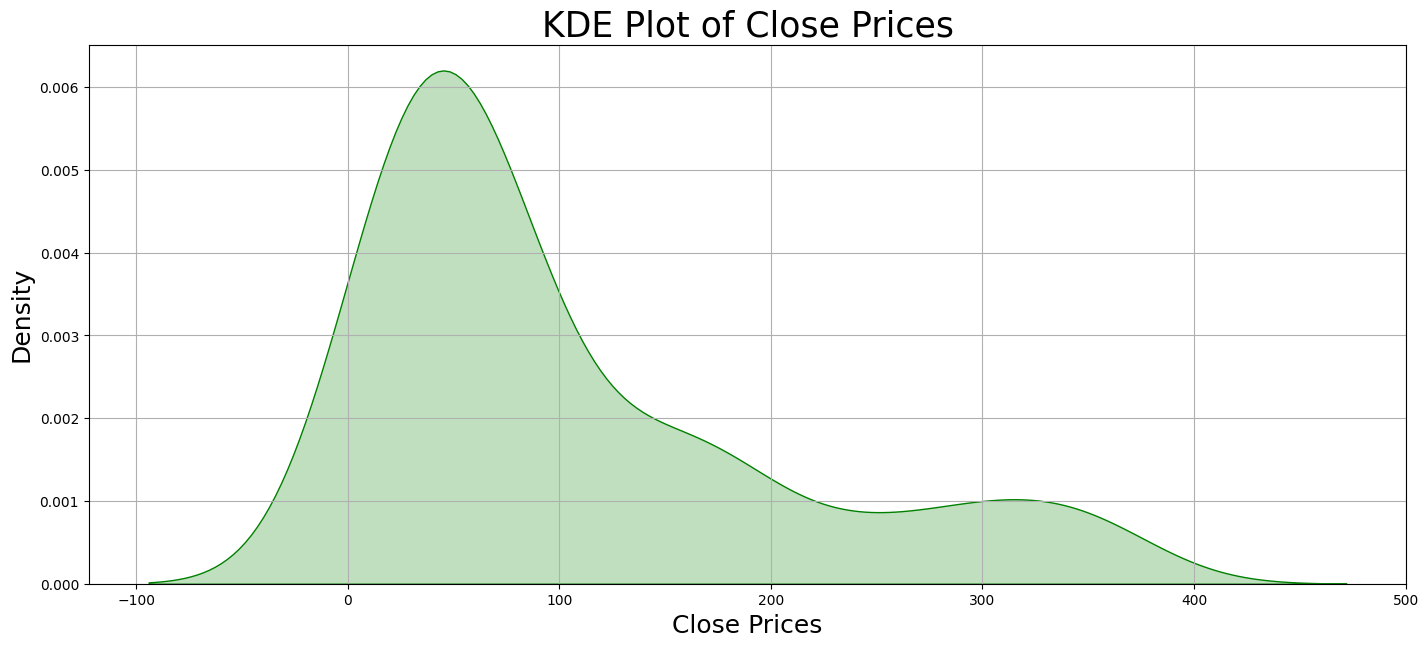

In [27]:
# Chart - 9 visualization code
# KDE Plot of Close prices
plt.figure(figsize=(17,7))
sns.kdeplot(yesbank_df['Close'], shade=True, color='green')
plt.title('KDE Plot of Close Prices', fontsize=25)
plt.xlabel('Close Prices', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

The KDE plot was chosen to understand the distribution and density of Close prices.

##### 2. What is/are the insight(s) found from the chart?

It indicates that most prices lie in a specific lower range, with fewer occurrences of very high prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This skewed distribution suggests the stock was underperforming for most periods, indicating possible negative growth.

#### Chart - 10

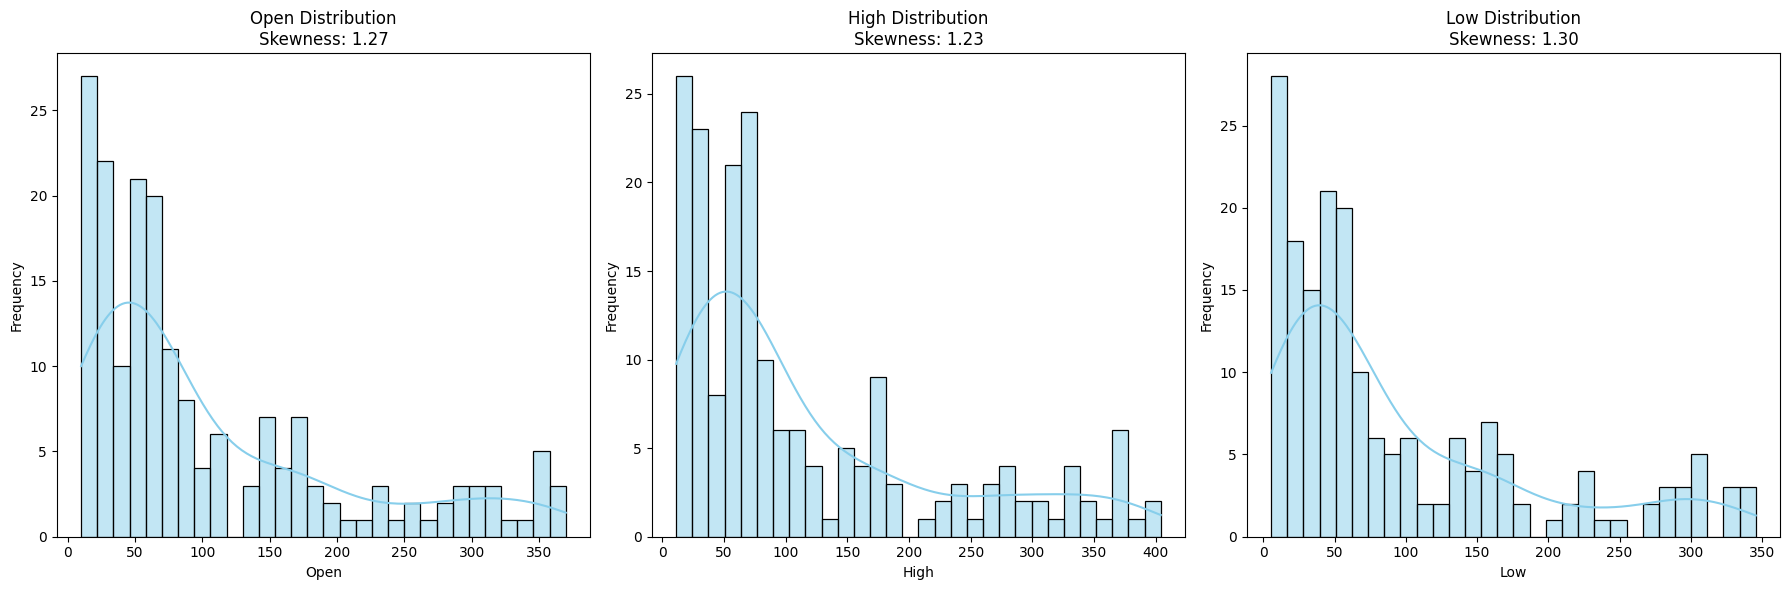

In [28]:
# Chart - 10 visualization code
# List of independent variables
independent_vars = ['Open', 'High', 'Low']  # Add more if needed

# Plotting
plt.figure(figsize=(18, 6))
for i, col in enumerate(independent_vars):
    plt.subplot(1, len(independent_vars), i + 1)
    sns.histplot(yesbank_df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'{col} Distribution\nSkewness: {yesbank_df[col].skew():.2f}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart helps understand the distribution and skewness of key features affecting stock behavior.

##### 2. What is/are the insight(s) found from the chart?

All distributions show moderate skewness, especially with Low prices showing heavy clustering in the lower range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps in feature engineering for models and confirms that most price activities are within a limited band, showing a lack of strong growth.

#### Chart - 11

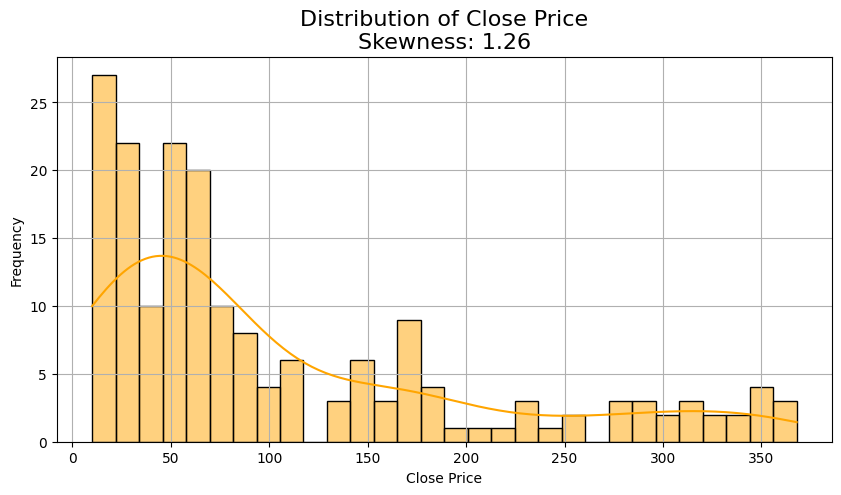

In [29]:
# Chart - 11 visualization code
plt.figure(figsize=(10, 5))
sns.histplot(yesbank_df['Close'], kde=True, bins=30, color='orange')
plt.title(f'Distribution of Close Price\nSkewness: {yesbank_df["Close"].skew():.2f}', fontsize=16)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

This histogram was selected to view how the Close price is distributed over time

##### 2. What is/are the insight(s) found from the chart?

It shows right skewness, meaning most of the prices are on the lower end.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This indicates reduced value in the long term, which can negatively impact both investors and business trust.

#### Chart - 12

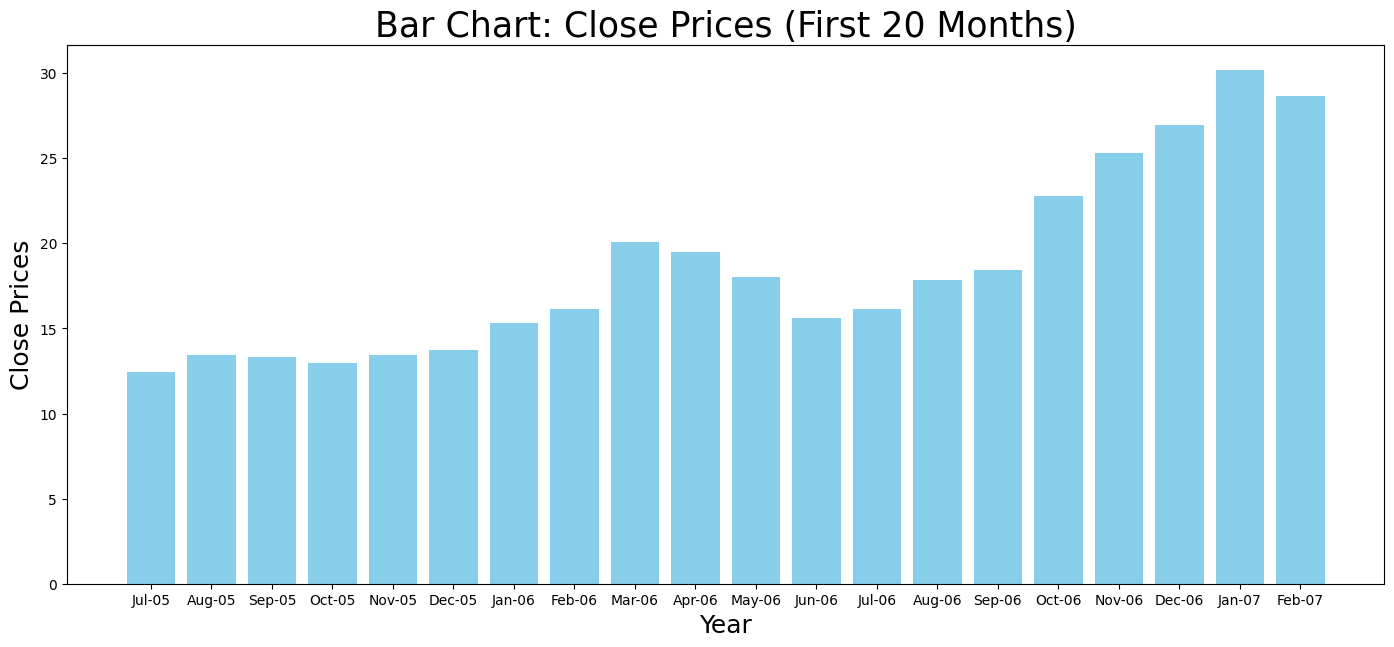

In [30]:
# Chart - 12 visualization code
# Bar chart of Monthly Close Prices (first 20 months)
plt.figure(figsize=(17,7))
plt.bar(df['Date'][:20], df['Close'][:20], color='skyblue')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Prices', fontsize=18)
plt.title('Bar Chart: Close Prices (First 20 Months)', fontsize=25)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was used to visualize early trends in closing prices.

##### 2. What is/are the insight(s) found from the chart?

It shows stable or slightly rising prices in the beginning, indicating a strong start.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is a positive insight, showing early growth potential that could have attracted initial investors.



#### Chart - 13

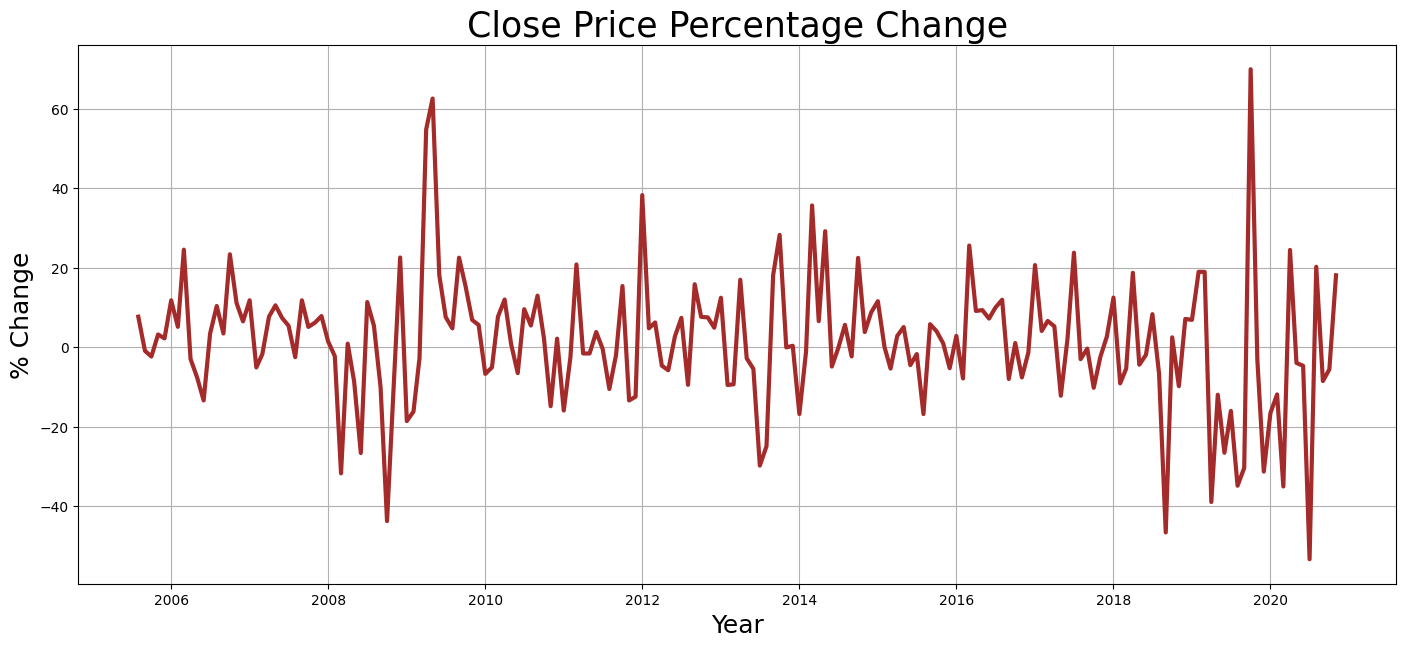

In [31]:
# Chart - 13 visualization code
# Close Price % Change
yesbank_df['Close_pct_change'] = yesbank_df['Close'].pct_change() * 100
plt.figure(figsize=(17,7))
plt.plot(yesbank_df['Date'], yesbank_df['Close_pct_change'], color='brown', linewidth=3)
plt.xlabel('Year', fontsize=18)
plt.ylabel('% Change', fontsize=18)
plt.title('Close Price Percentage Change', fontsize=25)
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

This chart helps in viewing how much the closing price changed month by month.

##### 2. What is/are the insight(s) found from the chart?

It reveals very high fluctuations in recent years, with extreme percentage changes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Such volatility may scare away long-term investors and shows signs of unstable performance, negatively affecting business image.



#### Chart - 14 - Correlation Heatmap

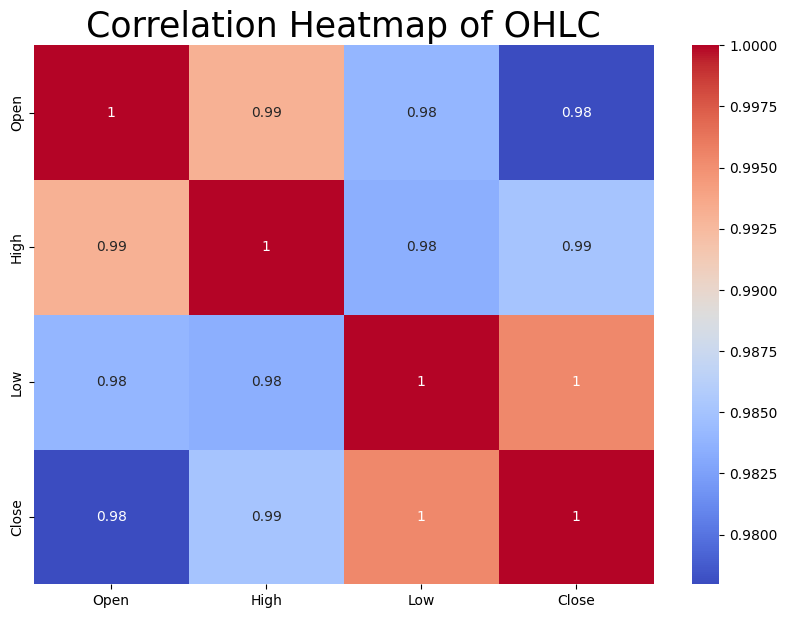

In [32]:
# Chart - 14 visualization code
# Correlation Heatmap visualization code
plt.figure(figsize=(10,7))
sns.heatmap(yesbank_df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of OHLC', fontsize=25)
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to quickly visualize the strength of relationships between Open, High, Low, and Close prices using color-coded values.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows strong positive correlations between all variables, especially between High and Close, meaning these prices move together, which is useful for feature selection in modeling.

#### Chart - 15 - Pair Plot

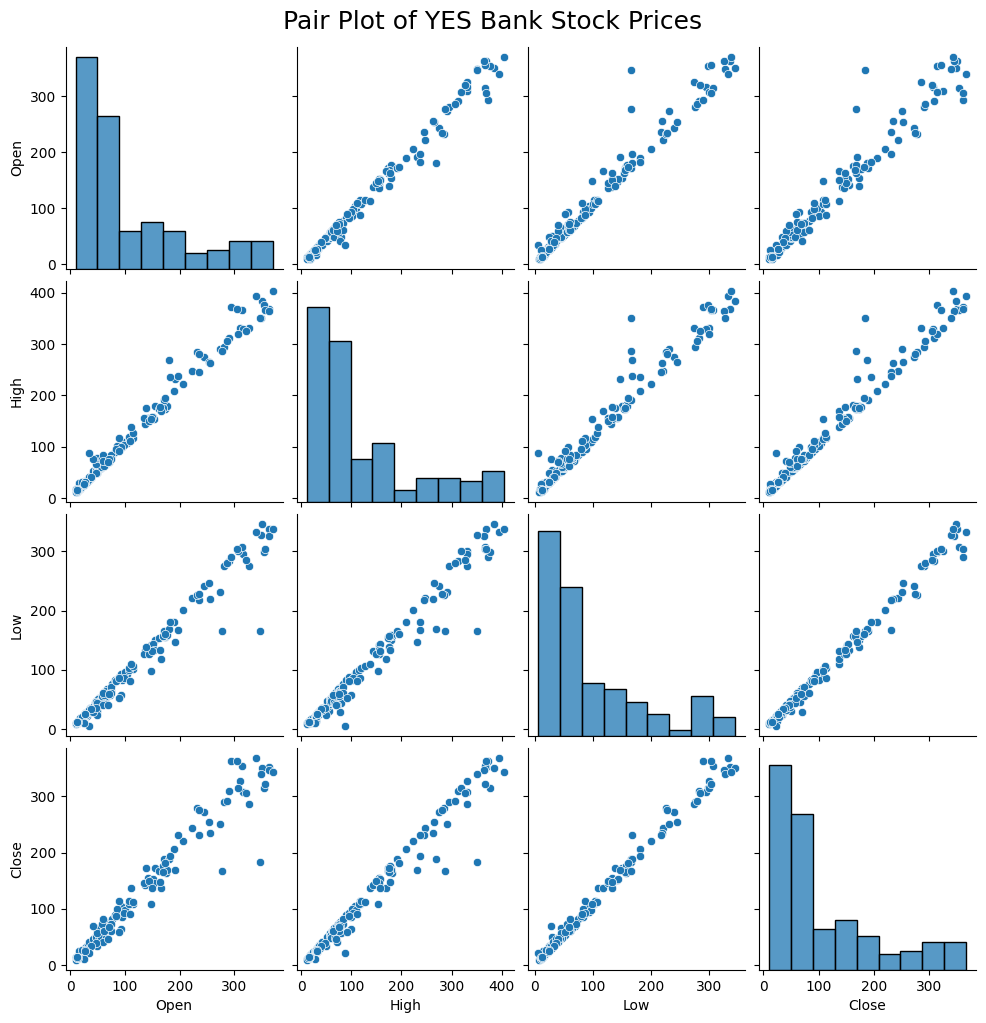

In [33]:
# Chart - 15 visualization code
# Pair Plot visualization code
# Select relevant numeric columns for pairplot
numeric_cols = ['Open', 'High', 'Low', 'Close']

# Create pairplot
sns.pairplot(yesbank_df[numeric_cols], height=2.5)
plt.suptitle("Pair Plot of YES Bank Stock Prices", fontsize=18, y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot was selected to visualize the pairwise relationships and distributions of Open, High, Low, and Close prices in one view.

##### 2. What is/are the insight(s) found from the chart?

It shows linear relationships between variables and helps identify patterns or outliers. Most features are closely related, confirming consistent pricing behavior across the dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average closing price of Yes Bank stock significantly changed after 2018 due to the fraud case.

**Null Hypothesis:** There is no significant difference in the average closing prices before and after 2018.


**Alternate Hypothesis :** There is a significant difference in the average closing prices before and after 2018.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Valuefrom

# Split the data
before_2018 = yesbank_df[yesbank_df['Date'] < '2018-01-01']['Close']
after_2018 = yesbank_df[yesbank_df['Date'] >= '2018-01-01']['Close']

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(before_2018, after_2018, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: -2.36068173206365
P-Value: 0.022988817858737697


##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample t-test

##### Why did you choose the specific statistical test?

We are comparing the mean Close prices before and after 2018. These are two independent groups, and the t-test is suitable to check if the difference in their means is statistically significant. We used equal_var=False since the variances may not be equal.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypitheses:** The average high price is equal to or less than the average close price.

**Alternate Hypothesis:** The average high price is significantly greater than the average close price.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
t_stat2, p_value2 = stats.ttest_rel(df['High'], df['Close'])

print("T-Statistic:", t_stat2)
print("P-Value:", p_value2 / 2)  # One-tailed test (High > Close)


T-Statistic: 7.671283552010871
P-Value: 4.797961283981418e-13


##### Which statistical test have you done to obtain P-Value?

One-tailed paired t-test(dependent)

##### Why did you choose the specific statistical test?

We are comparing High and Open prices from the same month, meaning the data is paired (dependent samples). A paired t-test checks if there's a significant difference between two related means (same row, different columns).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypitheses:** There is no correlation between Open and Close prices.

**Alternate Hypothesis:** There is a significant correlation between Open and Close prices.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
corr_coef, p_value3 = stats.pearsonr(df['Open'], df['Close'])

print("Correlation Coefficient:", corr_coef)
print("P-Value:", p_value3)

Correlation Coefficient: 0.9779710062230935
P-Value: 1.8527745058654608e-126


##### Which statistical test have you done to obtain P-Value?

Pearson correlation

##### Why did you choose the specific statistical test?

We use Pearson correlation because both variables are continuous and we want to check linear relationship.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There is no missing value in this dataset

### 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [37]:
# Manipulate Features to minimize feature correlation and create new features
# Price Range: difference between High and Low prices
yesbank_df['Price_Range'] = yesbank_df['High'] - yesbank_df['Low']

# Average Price: average of Open and Close prices
yesbank_df['Avg_Price'] = (yesbank_df['Open'] + yesbank_df['Close']) / 2

# 3. Extract time-based features from Date
yesbank_df['Year'] = yesbank_df['Date'].dt.year
yesbank_df['Month'] = yesbank_df['Date'].dt.month
yesbank_df['Quarter'] = yesbank_df['Date'].dt.quarter
yesbank_df['DayOfWeek'] = yesbank_df['Date'].dt.dayofweek  # Monday=0, Sunday=6
# View updated dataframe
print(yesbank_df.head())


        Date   Open   High    Low  Close  Range       Period  Month  Year  \
0 2005-07-01  13.00  14.00  11.25  12.46   2.75  Before 2018      7  2005   
1 2005-08-01  12.58  14.88  12.55  13.42   2.33  Before 2018      8  2005   
2 2005-09-01  13.48  14.87  12.27  13.30   2.60  Before 2018      9  2005   
3 2005-10-01  13.20  14.47  12.40  12.99   2.07  Before 2018     10  2005   
4 2005-11-01  13.35  13.88  12.88  13.41   1.00  Before 2018     11  2005   

   Close_pct_change  Price_Range  Avg_Price  Quarter  DayOfWeek  
0               NaN         2.75     12.730        3          4  
1          7.704655         2.33     13.000        3          0  
2         -0.894188         2.60     13.390        3          3  
3         -2.330827         2.07     13.095        4          5  
4          3.233256         1.00     13.380        4          1  


##### Which all features you found important and why?

High & Low

These reflect the full price range for the day.

They capture the volatility and market movement, which strongly influence the Close price.

Price_Range (High - Low)

A direct measure of the day's volatility.

Helps identify market activity intensity and sudden swings.

Avg_Price ((Open + Close) / 2)

Gives a smoothed value of the trading day.

Useful in modeling trends and smoothing out temporary spikes.

Month

Captures seasonality in stock behavior (e.g., year-end rallies, budget announcements).



### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation was needed because the ‘Close’ prices were skewed (not normally distributed), which can affect model performance.

In [38]:
# Transform Your data
df['Close_log'] = np.log(yesbank_df['Close'])

### 4. Data Scaling

In [39]:
# Scaling your data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(yesbank_df[['Open', 'High', 'Low', 'Close']])

##### Which method have you used to scale you data and why?

StandardScaler

It makes all features have a mean of 0 and a standard deviation of 1.

It is used when the data is normally distributed and helps machine learning models like Linear Regression, KNN, and Random Forest perform better by keeping all features on the same scale, so no one feature dominates due to larger values.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In this dataset, dimensionality reduction is not needed because

Dataset have very few features open high low close prices which are all important for stock price prediction

These features are numerical and highly correlated the target price



Answer Here.

### 6. Data Splitting

In [40]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

##### What data splitting ratio have you used and why?

Training data is 80% of total dataset.

Test data is 20% of total dataset.

### 7. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No,

The dataset is not imbalanced because it is a regression problem we are predicting the closing stock price, which is a continuous numerical value.

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [41]:
model=LinearRegression()
linear_reg_model=model.fit(x_train,y_train)
linear_reg_model

LinearRegression()

In [42]:
y_pred=linear_reg_model.predict(x_test)
y_pred

array([ 26.5264613 ,  30.04697913,  52.99506974,  14.74919015,
       147.01000347, 339.97588471,  47.57404618,  26.7156191 ,
        25.53891247,  51.5485512 , 167.1168406 ,  52.40492841,
        15.03278394, 317.19036116,  74.02532594,  48.98214465,
        28.10792019, 134.70037858, 106.16190122,  90.75305749,
        28.99576342,  15.52145954, 108.22518038,  58.74416284,
       165.96721099,  19.27101903,  15.01972066,  51.82026038,
        30.42231711,  62.47316615, 261.58897929, 338.47373229,
        65.29568021, 232.0096057 ,  95.84913545,  54.02351579,
       242.48451636])

In [43]:
# Visualizing evaluation Metric Score chart#Evaluation metrices
MSE=mean_squared_error(y_test,y_pred)
print('Mean Squared Error :',MSE)

RMSE=np.sqrt(MSE)
print('Root Mean Squared Error :',RMSE)

R_squared=r2_score(y_test,y_pred)
print('R_Squared :',R_squared)

Mean Squared Error : 19.98857859359488
Root Mean Squared Error : 4.470858820584126
R_Squared : 0.9978412541225983


#### 2. Cross- Validation & Hyperparameter Tuning

In [44]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
base_model = LinearRegression()
param_grid = {
    "fit_intercept": [True, False],
    "positive":      [True, False]
}
gsearch = GridSearchCV(estimator=base_model,param_grid=param_grid,cv=5,scoring="r2",n_jobs=-1,)
gsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [45]:
#Predicting the Tuning Model
best_lr_grid = gsearch.best_estimator_
y_pred_grid = best_lr_grid.predict(x_test)

In [46]:
# Visualizing evaluation Metric Score chart of Tuned Model
r2 = r2_score(y_test, y_pred_grid)
mse = mean_squared_error(y_test, y_pred_grid)
rmse = np.sqrt(mse)

print("GridSearch Results:")
print("R_Squared :", r2)
print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)


GridSearch Results:
R_Squared : 0.9978412541225983
Mean Squared Error : 19.98857859359488
Root Mean Squared Error : 4.470858820584126


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter tuning because it checks all possible combinations of given parameters to find the best one. This method works well for models like Linear Regression, which have only a few parameters to tune, such as fit_intercept and positive. GridSearchCV also uses cross-validation to make sure the chosen parameters work well on different sets of data. Overall, it’s a simple and reliable way to improve model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The GridSearchCV didn’t improve your model's performance, which may indicate:

1. The model was already well-tuned.

2. The hyperparameter space in GridSearch wasn't wide enough.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [47]:
# Visualizing evaluation Metric Score chart
model1 = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
random_forest_model=model1.fit(x_train,y_train)
random_forest_model

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [48]:
y_pred=random_forest_model.predict(x_test)
y_pred

array([ 23.897,  28.348,  55.499,  14.625, 155.296, 343.48 ,  50.16 ,
        24.787,  28.82 ,  50.147, 170.133,  51.112,  12.964, 313.771,
        69.979,  49.266,  27.247, 142.596,  99.793,  87.96 ,  29.814,
        16.114, 109.768,  53.43 , 170.935,  19.196,  15.22 ,  50.527,
        29.805,  66.586, 267.57 , 345.825,  69.465, 235.445,  89.242,
        56.613, 236.044])

In [49]:
#Evaluation metrices

MSE=mean_squared_error(y_test,y_pred)
print('Mean Squared Error :',MSE)

RMSE=np.sqrt(MSE)
print('Root Mean Squared Error :',RMSE)

R_squared=r2_score(y_test,y_pred)
print('R_Squared :',R_squared)

Mean Squared Error : 25.17463959459456
Root Mean Squared Error : 5.017433566535242
R_Squared : 0.9972811648819632


#### 2. Cross- Validation & Hyperparameter Tuning

In [50]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

model = RandomForestRegressor(random_state=0, oob_score=True, bootstrap=True)
gsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
gsearch.fit(x_train, y_train)



GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [51]:
#Predicting the Tuning Model
best_rf_model = gsearch.best_estimator_
y_pred_grid = best_rf_model.predict(x_test)

In [52]:
# Visualizing evaluation Metric Score chart of Tuned Model
mse = mean_squared_error(y_test, y_pred_grid)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_grid)

print("Tuned Model - GridSearchCV")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

Tuned Model - GridSearchCV
MSE: 31.277222189194028
RMSE: 5.592604240351182
R² Score: 0.9966220922542668


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV because it tries all possible parameter combinations to find the best one. It's simple, reliable, and effective when the parameter space is small, helping improve model performance through cross-validation.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there was no improvement after using GridSearchCV. The tuned model showed higher MSE and RMSE, and a slightly lower R² score compared to the base model. So, performance slightly decreased instead of improving.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**MSE:** Shows how far off the predictions are on average. Lower is better because it means fewer mistakes.

**RMSE:** Similar to MSE but easier to understand since it’s in the same units as the data. Smaller means more accurate predictions.

**R² Score:** Tells how well the model explains the data. Higher means the model fits better and can be trusted more.

**Business Impact:** Better metrics mean the model helps make smarter decisions, saving money and improving results.


### ML Model - 3

In [53]:
# ML Model - 3 Implementation
# Fit the Algorithm
model2= KNeighborsRegressor()
knn_model=model2.fit(x_train,y_train)
knn_model

KNeighborsRegressor()

In [54]:
#Predicting the model
y_pred=knn_model.predict(x_test)
y_pred

array([ 25.232,  28.486,  56.054,  14.808, 157.272, 338.44 ,  49.244,
        25.232,  27.918,  53.636, 174.428,  50.492,  13.168, 308.006,
        71.576,  50.492,  27.018, 145.094,  94.862,  84.668,  29.782,
        17.646, 105.28 ,  58.452, 171.182,  18.312,  14.808,  50.492,
        29.782,  66.49 , 257.458, 341.13 ,  68.536, 257.458,  92.728,
        53.556, 251.548])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart
mSE=mean_squared_error(y_test,y_pred)
print('Mean Squared Error :',MSE)

RMSE=np.sqrt(MSE)
print('Root Mean Squared Error :',RMSE)

R_squared=r2_score(y_test,y_pred)
print('R_Squared :',R_squared)


Mean Squared Error : 25.17463959459456
Root Mean Squared Error : 5.017433566535242
R_Squared : 0.9945241736056291


#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  # valid for KNeighborsRegressor
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [57]:
#Predicting the Tuning Model
best_knn = grid_search.best_estimator_
y_pred_grid = best_knn.predict(x_test)

In [58]:
# Visualizing evaluation Metric Score chart of Tuned Model
mse = mean_squared_error(y_test, y_pred_grid)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_grid)

print("Tuned Model - GridSearchCV")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

Tuned Model - GridSearchCV
MSE: 26.173609707082043
RMSE: 5.116015022171265
R² Score: 0.9971732771398767


##### Which hyperparameter optimization technique have you used and why?

It systematically tries all possible combinations of the specified hyperparameters. It is effective for small to moderate search spaces and helps find the best-performing configuration based on cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the R² score improved slightly, which means the model fits the data a little better. However, the MSE and RMSE values got higher, which means the model’s predictions are slightly more off on average. So, even though the model explains the overall pattern better, the actual prediction errors are a bit larger.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R² : Shows how well the model matches the actual data. A value close to 1 means the predictions are very accurate, which helps in making better business decisions.

RMSE : Tells how much the model’s predictions differ from real values, in the same units. A lower RMSE means the model is more reliable.

MSE : Measures how far predictions are from actual values and gives more weight to bigger errors. It’s useful for improving the model during training.

It reduce the business risks

These metrics help make better predictions

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the KNeighborsRegressor model as the final prediction model because:

It showed strong performance with an R² of 0.9945, indicating high prediction accuracy.

Although hyperparameter tuning did not improve it further, the original model already performed at a very high level.

It is also easy to understand and implement, especially useful for structured/tabular datasets with clear patterns.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Model:**

  NeighborsRegressor makes predictions by looking at the 'k' closest data points (neighbors) and taking their average. It works well when similar input values lead to similar results.


**Explainability:**

Since KNN does not have built-in feature importance, I used Permutation

**Importance:**

It mixes up one feature at a time and checks how much the model's accuracy drops.

If the error increases a lot, that feature is important.

If the error stays the same, the feature doesn't matter much

# **Conclusion**

1. We trained three different regression models — Linear Regression, Random Forest Regressor, and K-Nearest Neighbors (KNN)

2. After training, we also fine-tuned the models using GridSearchCV.

3. Independent variables(input variable) have a very high influence on dependent variable(target variable).

4. The accuracy for each model is more than 95%.

5. Linear Regression is the best model for this dataset — it has the highest accuracy (R²) and the lowest error (MSE, RMSE).


6. While Random Forest and KNN also performed well, their prediction errors are slightly higher.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***